In [ ]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [ ]:

# Cargar el conjunto de datos CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:

# Normalizar los datos a un rango entre 0 y 1
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:

# Crear el modelo de la red neuronal convolucional (CNN)
model = Sequential()


In [ ]:

# Capa convolucional 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Capa convolucional 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


In [ ]:

# Capa convolucional 3
model.add(Conv2D(64, (3, 3), activation='relu'))


In [ ]:

# Aplanar las salidas para pasar a las capas densas
model.add(Flatten())

# Capa densa
model.add(Dense(64, activation='relu'))

# Capa de salida con 10 clases (CIFAR-10 tiene 10 categorías)
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 86ms/step - accuracy: 0.3244 - loss: 1.8325
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.5567 - loss: 1.2428
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.6230 - loss: 1.0752
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.6636 - loss: 0.9600
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.6838 - loss: 0.8992
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.7109 - loss: 0.8244
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.7299 - loss: 0.7753
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7456 - loss: 0.7382
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 85ms/step - accuracy: 0.7561 - loss: 0.6880
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.7754 - loss: 0.6482


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7137 - loss: 0.8551
Precisión del modelo CNN: 70.78%
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


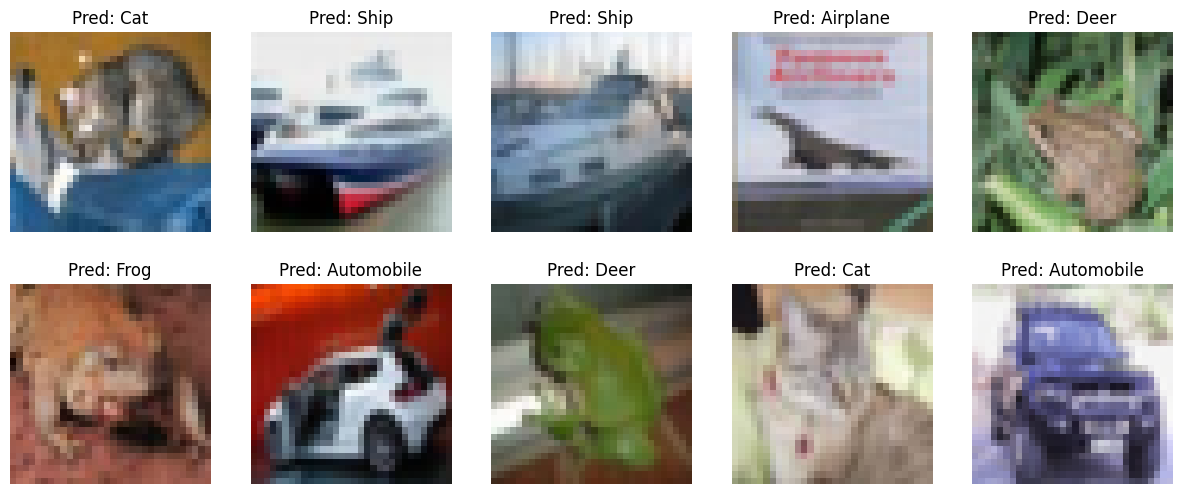

In [ ]:

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión del modelo CNN: {test_accuracy * 100:.2f}%")

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mostrar algunas imágenes de prueba y sus predicciones
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Etiquetas de las clases del CIFAR-10
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Mostrar las primeras 10 imágenes y sus etiquetas predichas
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    ax.set_title(f"Pred: {labels[y_pred_classes[i]]}")
    ax.axis('off')

plt.show()
